In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Constant δ ∧ Perfect immunity ∧ Cpv = Clv = Cr

In [18]:
def various_delta_plot(graph_for="FES", save=False):
    plt.rcParams["font.size"] = 18
    fig = plt.figure(figsize=(20, 10))
    for i, delta in enumerate([0.2, 0.5, 0.8, 1.0]):
        df = pd.read_csv(f"src/result1_delta_{delta}.csv")
        x = df.Cr
        fig.add_subplot(2, 3, i+1)
        plt.scatter(x = x, y = df[graph_for]) 
        plt.title(f"δ = {delta}")
        plt.xticks(np.arange(0, 1.2, step=0.2))
        
        if graph_for == "SAP":
            plt.yticks(np.arange(-1, 0.2, step=0.2))
        else:
            plt.yticks(np.arange(0, 1.2, step=0.2))
        
        plt.xlabel("Cr")
        plt.tight_layout()

    plt.suptitle(graph_for, y = 1.02)

    if save == True:
        fig.savefig(f"{graph_for}.png", bbox_inches="tight")
    plt.show()

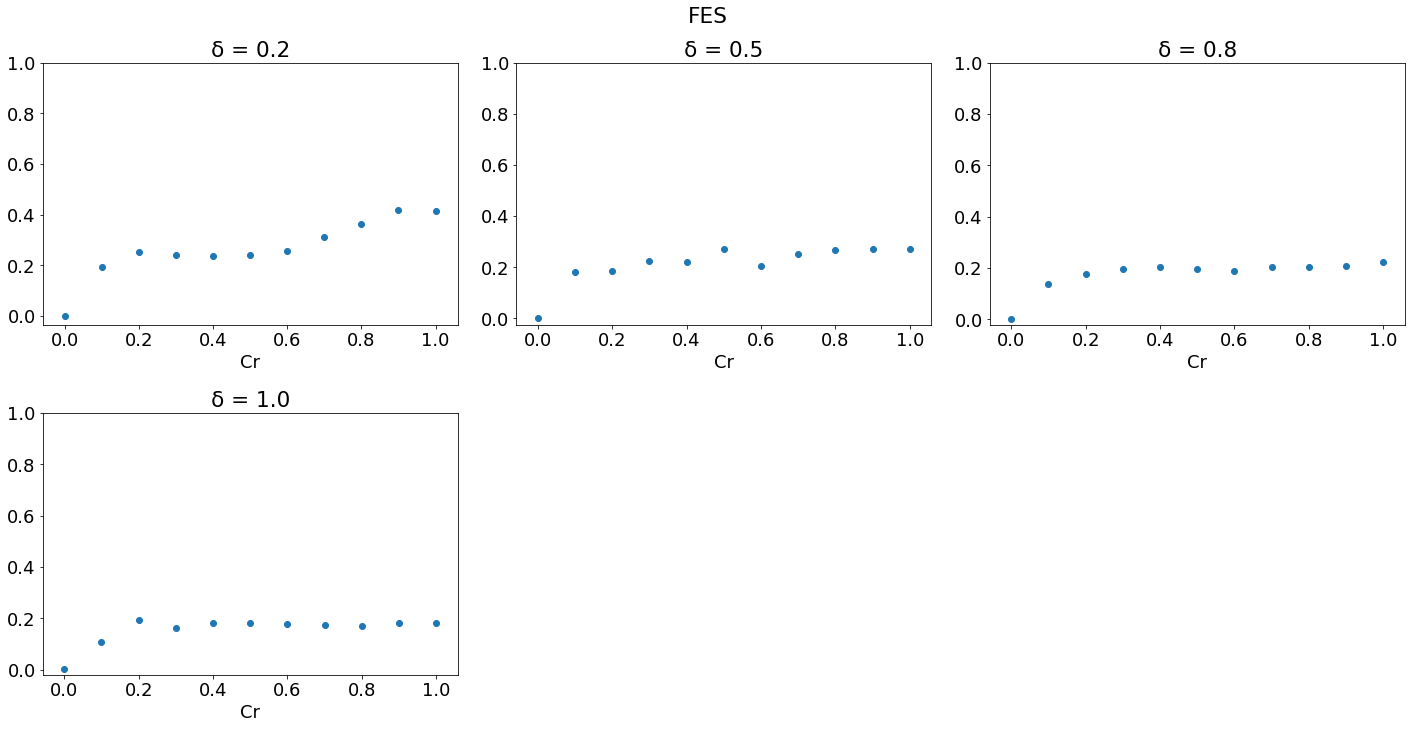

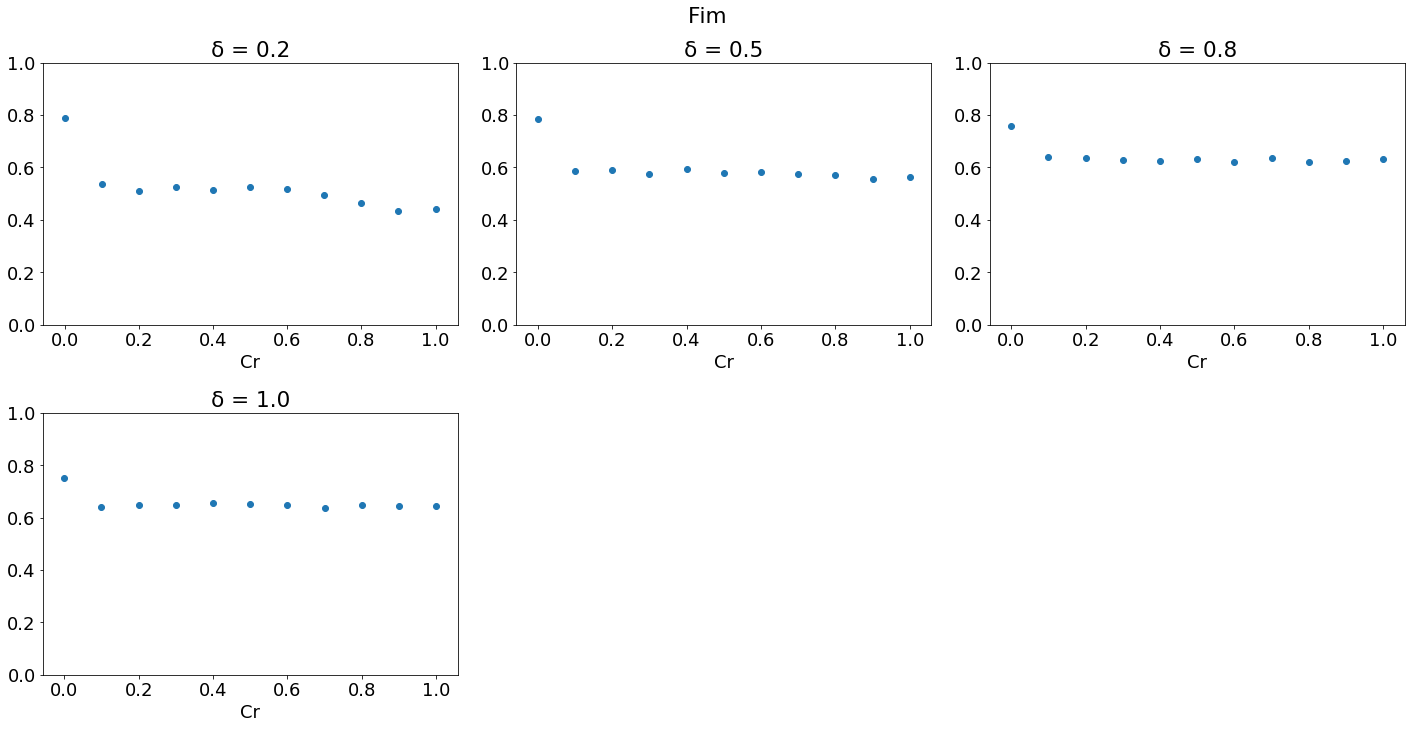

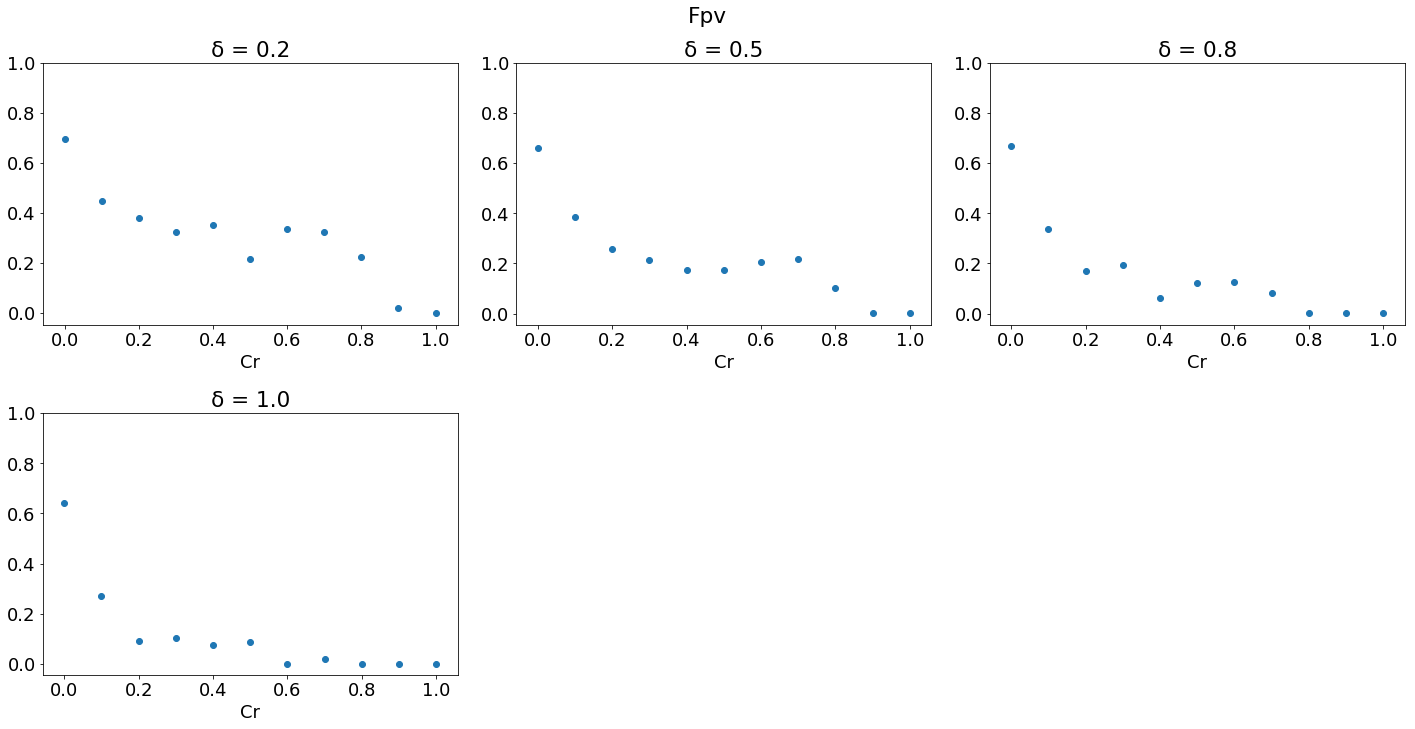

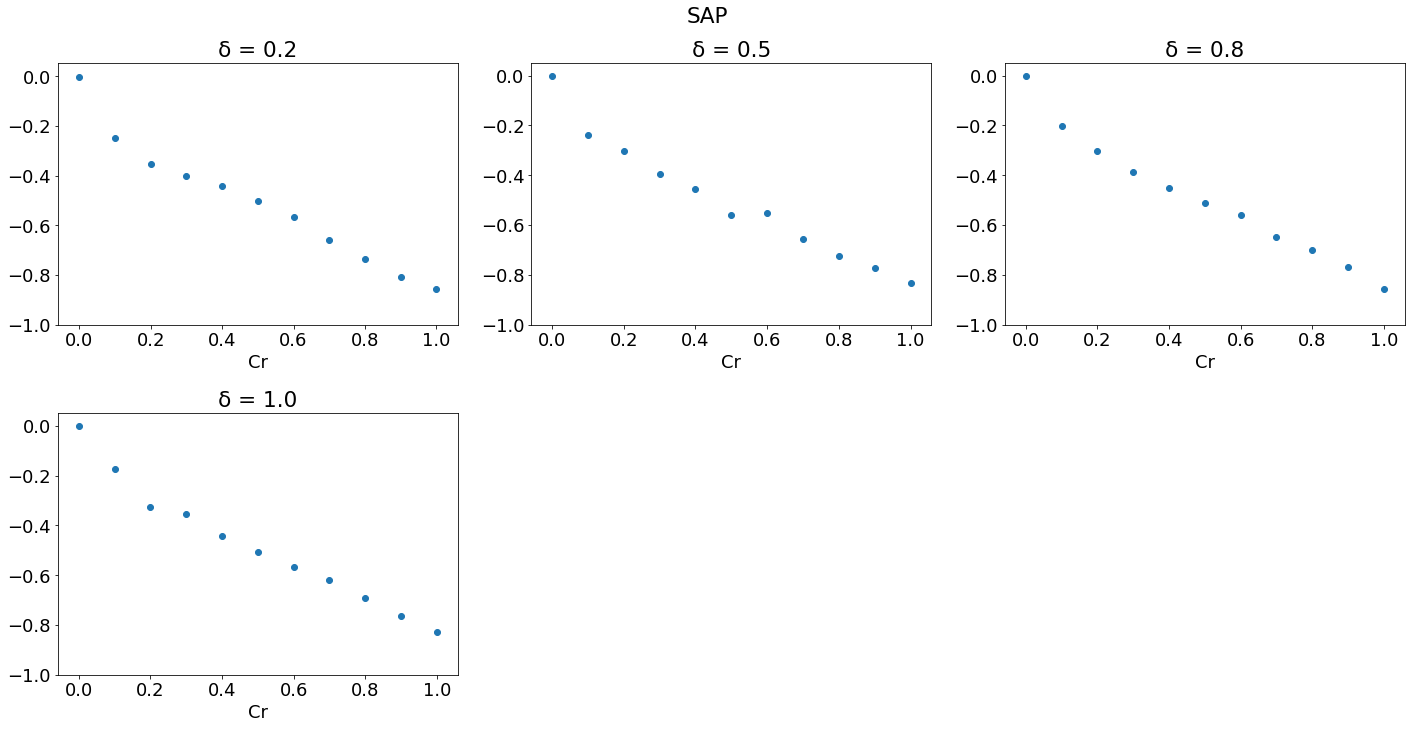

In [20]:
various_delta_plot("FES", save=True)
various_delta_plot("Fim", save=True)
various_delta_plot("Fpv", save=True)
various_delta_plot("SAP", save=True)

 # Clv dependent PVLV model

\[ \frac{dS_{PV}}{dt} = - \beta S_{PV} I_{total} \]

\[ \frac{dI_{PV}}{dt} = \beta S_{PV} I_{total} - \gamma I_{PV} \]

\[ IM_{PV} = ePV \]

\[ \frac{dS_{LV}}{dt} = - \beta S_{LV} I_{total} - ex SFR \]

\[ \frac{dI_{LV}}{dt} = \beta S_{LV} I_{total} - \gamma I_{LV} \]

\[ \frac{dIM_{LV}}{dt} = ex SFR \]

\[ \frac{dR}{dt} = \gamma I_{total} \]

\[ \frac{dHV_{LV}}{dt} = x SFR - \beta SV_{LV} I_{total} \]

\[ \frac{dIV_{LV}}{dt} = \beta SV_{LV} I_{total} \]

\[ SV_{LV} = HV_{LV} - IM_{LV} \]

\[ I_{total} = I_{PV} + I_{LV} \]

\[ V_{total} = PV + HV_{LV} + IV_{LV} \]

\[ SFR = S_{LV} - SV_{LV} \]

\[ x = \frac{\delta}{C_{LV}} \frac{I_{total}}{V_{total} + \epsilon } \]

\[ \delta = 0.25 \]

\[ -C_{PV} \]

\[ -C_{PV}-1 \]

\[ -C_{LV} \]

\[ -C_{LV} -1 \]

## 1エピソードでCpv-Effectivenessの相図を覗いてみる

In [13]:
df = pd.read_csv("PVLV_model/clv-dependent-δmodel/test_result/imperfect_result1.csv")
df.tail()

,Cpv,Clv,effectiveness,FES,Fv,Fim,Fpv,SAP
1326,0.6,1.0,1.0,0.20261,0.52750,0.52750,0.39527,-0.572002
1327,0.7,1.0,1.0,0.21835,0.50839,0.50839,0.35364,-0.620648
1328,0.8,1.0,1.0,0.23085,0.50908,0.50908,0.34695,-0.670540
1329,0.9,1.0,1.0,0.28558,0.50428,0.50428,0.29848,-0.760012
1330,1.0,1.0,1.0,0.37738,0.46055,0.46055,0.00086,-0.837930


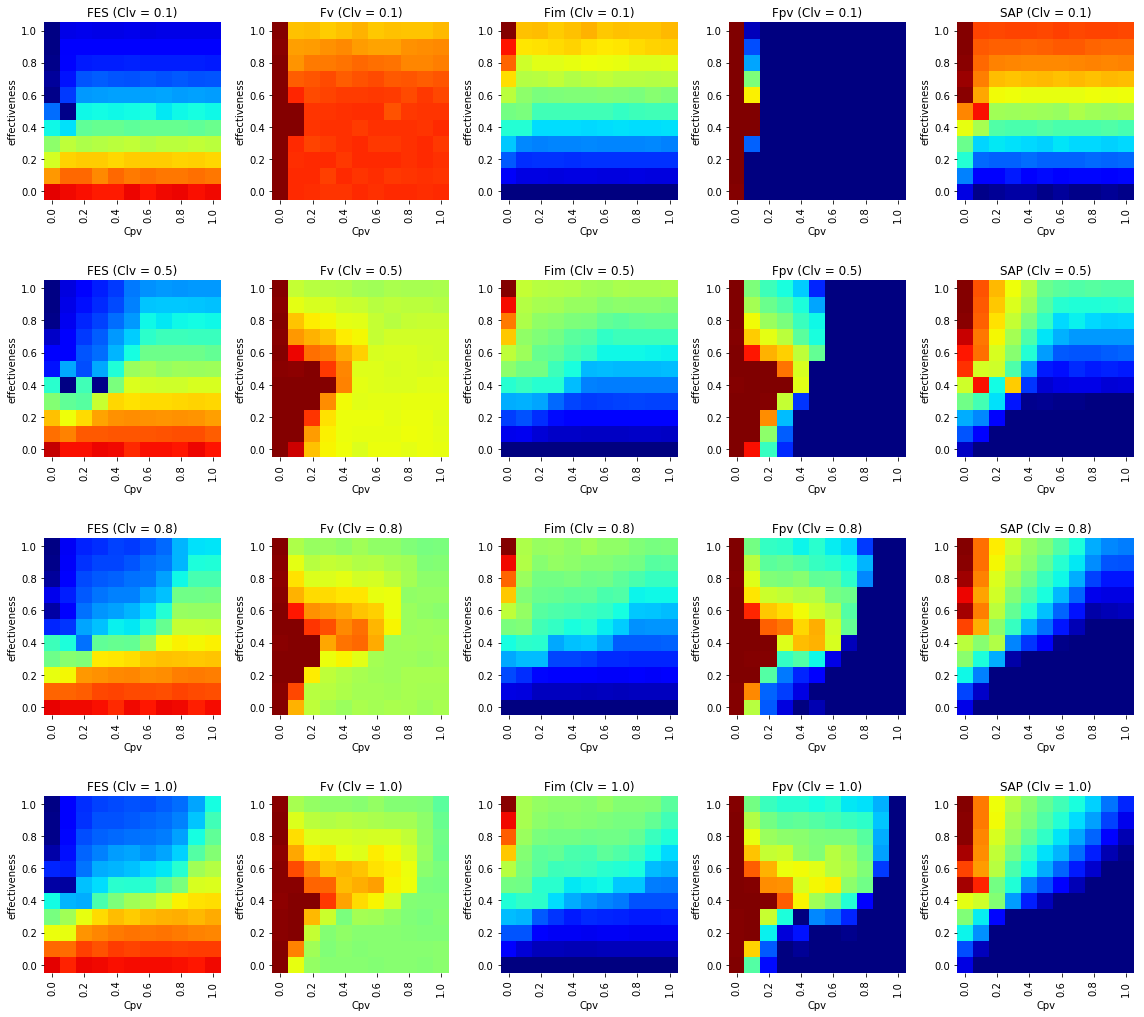

In [14]:
fig = plt.figure(figsize=(16, 18))
graph_pos = 0
for Clv in [0.1, 0.5, 0.8, 1.0]:
    df_plot = df[df.Clv == Clv]
    for value in ["FES", "Fv", "Fim", "Fpv", "SAP"]:
        graph_pos += 1
        if value == "SAP":
            vmin, vmax = -1.0, 0
        else:
            vmin, vmax = 0, 1.0
        
        ax = fig.add_subplot(5, 5, graph_pos)
        ax.set_title(value + f" (Clv = {Clv})")
        pivot = df_plot.pivot("effectiveness", "Cpv", value)
        sns.heatmap(pivot, cmap="jet", vmin=vmin, vmax=vmax, cbar=False, square=True, xticklabels=2, yticklabels=2, cbar_kws = {"orientation": "horizontal"})
        plt.yticks(rotation='horizontal')
        plt.xticks(rotation='vertical')
        plt.gca().invert_yaxis()
        plt.tight_layout()

- Clvが下がってくるとClv = 0.5まではFESは悪化するが(Cpvが高い領域)、それ以上Clvが安くなるとFESは一気に改善される。
- Clv = 0.5でFESが悪くなっている領域にもかかわらずSAPはClvが高いときより良くなっているように見えているのは単純にClvが小さくなっていることでLVが支払うコストが減っているためにそう見えているだけではないかと思われる(SAPがよくなっている領域はPVがほぼ居ないので、結果を決めているのはLVのみ。そのLVはClvの減少と共に全体的に増えていっているので、これらの増加したLVの人達がPVより安くワクチンを打ちまくっているからFESは良くならないけどSAPだけ良くなったように見えているのだと思われる

## 1エピソードでCpv-Clvの相図を覗く

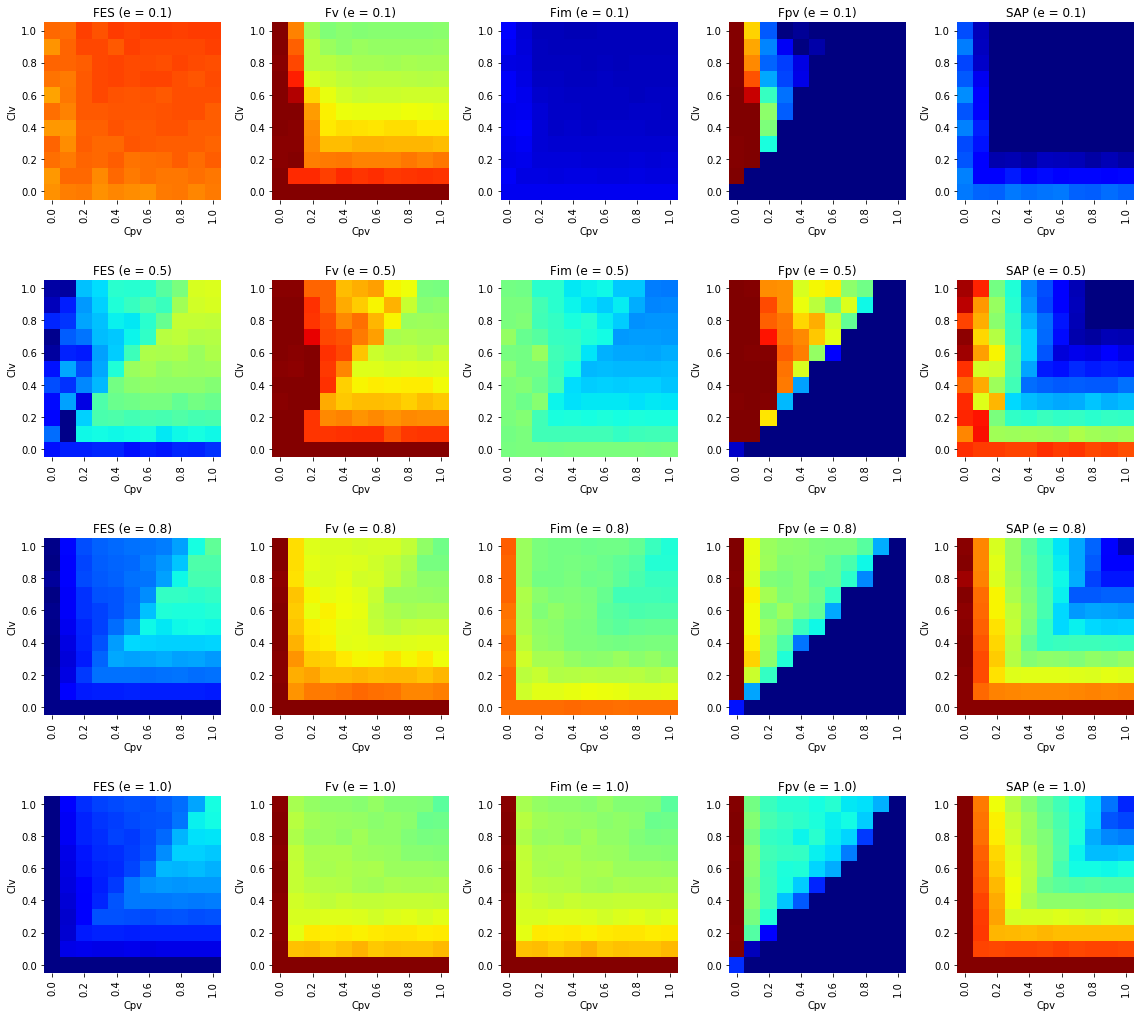

In [15]:
fig = plt.figure(figsize=(16, 18))
graph_pos = 0
for e in [0.1, 0.5, 0.8, 1.0]:
    df_plot = df[df.effectiveness == e]
    for value in ["FES", "Fv", "Fim", "Fpv", "SAP"]:
        graph_pos += 1
        if value == "SAP":
            vmin, vmax = -1.0, 0
        else:
            vmin, vmax = 0, 1.0
        
        ax = fig.add_subplot(5, 5, graph_pos)
        ax.set_title(value + f" (e = {e})")
        pivot = df_plot.pivot("Clv", "Cpv", value)
        sns.heatmap(pivot, cmap="jet", vmin=vmin, vmax=vmax, cbar=False, square=True, xticklabels=2, yticklabels=2, cbar_kws = {"orientation": "horizontal"})
        plt.yticks(rotation='horizontal')
        plt.xticks(rotation='vertical')
        plt.gca().invert_yaxis()
        plt.tight_layout()

- e = 0.5 以下の場合Clvの増加に伴って最初はFpvも高まるが途中で減少し始める    
    ➔ 最初はClvの増加と共にLVからPVに流れていく    
    ➔ が、Clvが高くなりすぎるとLVを選んでいるのにワクチンを打てない人(高価なClvを払わずに済む人)が増える    
    ➔ 結果それ以上Fpvが増えること無く, むしろ人々を強制的にフリーライダー化させる事になる    
    
- SAPはClv = Cpvのラインより下の領域(Late vaccinationがPre-emptiveより手軽に行える領域)で非常に良くなると思っていたが, 実際はほぼ軸対称だった    
    ➔ LVが手軽に行えるせいでみんなLVに流れる     
    ➔ むしろ社会全体の感染リスクは高まる     
    ➔ そのせいで感染コストの大きさが効いてSAPが悪くなり、Clvの低さというアドバンテージを上回る損失を被っている    

# 100アンサンブル取った結果

In [86]:
# まず最初に全effectivenessで23エピソード計算した分からe = [0.1, 0.5, 0.8, 1.0]の部分のみ抽出してFES 〜 Fvlvについて和を取っておく

results = [pd.read_csv(f"PVLV_model/clv-dependent-δmodel/result_with_every_effectiveness/result{i}.csv").query("effectiveness in (0.1, 0.5, 0.8, 1.0)") for i in range(1, 25)]
sum_24_episodes = sum(results)
sum_24_episodes.rename(columns={'effectiveness': 'Effectiveness'}, inplace=True)
sum_24_episodes.reset_index(drop = True, inplace = True)
sum_24_episodes.head()

,Cpv,Clv,Effectiveness,FES,Fv,Fim,Fpv,SAP
0,0.0,0.0,2.4,18.336698,23.984208,2.398104,2.424969,-18.336698
1,2.4,0.0,2.4,18.467384,23.986531,2.398902,0.020424,-18.469426
2,4.8,0.0,2.4,18.463464,23.985547,2.397932,0.014229,-18.466310
3,7.2,0.0,2.4,18.391617,23.985605,2.398333,0.019430,-18.397446
4,9.6,0.0,2.4,18.489411,23.985719,2.398990,0.016577,-18.496042


In [87]:
# 次に後半
results_2 = [pd.read_csv(f"PVLV_model/clv-dependent-δmodel/result{i}.csv") for i in range(25, 101)]
sum_75_episodes = sum(results_2)

# 2つのdfを結合して平均値をとる
ensemble = sum([sum_24_episodes, sum_75_episodes])
ensemble[["Cpv", "Clv", "Effectiveness"]] = ensemble[["Cpv", "Clv", "Effectiveness"]].apply(lambda x: round(x/100, 1))
ensemble[["FES", "Fv", "Fim", "Fpv", "SAP"]] /= 100
ensemble["Fvlv"] = ensemble.Fv - ensemble.Fpv
ensemble.head()

,Cpv,Clv,Effectiveness,FES,Fv,Fim,Fpv,SAP,Fvlv
0,0.0,0.0,0.1,0.765000,0.999376,0.099972,0.102474,-0.765000,0.896901
1,0.1,0.0,0.1,0.768919,0.999427,0.099954,0.000849,-0.769004,0.998577
2,0.2,0.0,0.1,0.769439,0.999411,0.099921,0.000611,-0.769561,0.998800
3,0.3,0.0,0.1,0.766958,0.999369,0.099964,0.000789,-0.767195,0.998581
4,0.4,0.0,0.1,0.768311,0.999411,0.099905,0.000697,-0.768590,0.998714


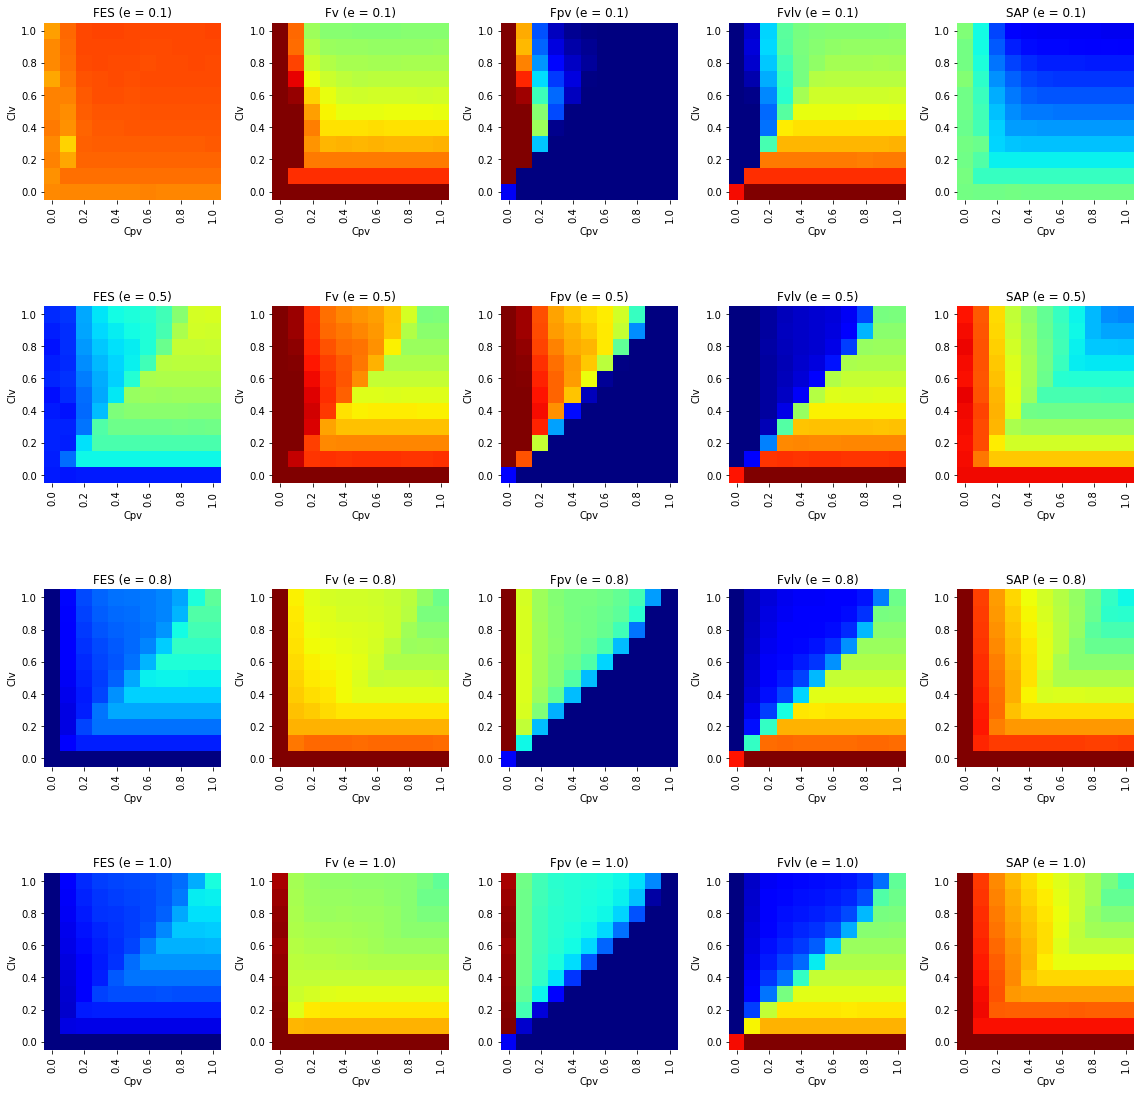

In [102]:
fig = plt.figure(figsize=(16, 20))
graph_pos = 0
for e in [0.1, 0.5, 0.8, 1.0]:
    for value in ["FES", "Fv", "Fpv", "Fvlv", "SAP"]:
        graph_pos += 1
        if value == "SAP":
            vmin, vmax = -1.5, 0
        else:
            vmin, vmax = 0, 1.0
        
        ax = fig.add_subplot(5, 5, graph_pos)
        ax.set_title(value + f" (e = {e})")
        pivot = ensemble[ensemble.Effectiveness == e].pivot("Clv", "Cpv", value)
        sns.heatmap(pivot, 
                    cmap="jet", 
                    vmin=vmin, 
                    vmax=vmax, 
                    cbar=False,
                    #annot = True,
                    square=True, 
                    xticklabels=2, 
                    yticklabels=2,
                    cbar_kws = {"orientation": "horizontal"})
        plt.yticks(rotation='horizontal')
        plt.xticks(rotation='vertical')
        plt.gca().invert_yaxis()
        plt.tight_layout()
fig.savefig("./PVLV_model/clv-dependent-δmodel/mas_ensembled.png")

In [ ]:
# Line plot用
fig = plt.figure(figsize=(18, 16))
plt.rcParams['font.size'] = 14
plot_value = "Fpv"
for index, e in enumerate([0.1, 0.2, 0.4, 0.5, 0.7, 0.9]):
    ax = fig.add_subplot(3,2,index+1)
    for cpv in np.arange(0, 1.1, 0.1):
        y = ensemble[(ensemble.effectiveness == e) & (ensemble.Cpv == cpv)][plot_value]
        x = ensemble[(ensemble.effectiveness == e) & (ensemble.Cpv == cpv)].Clv
        ax.plot(x, y, label = f'Cpv = {cpv:.1f}')
        ax.set_xlim([-0.1, 1.3])
        ax.set_xlabel("Clv")
        ax.set_ylabel(plot_value)
        ax.set_title(f"effectiveness = {e:.1f}")
        ax.legend(loc = "upper right")
        plt.tight_layout()
        fig.suptitle(plot_value, y = 1.01, fontsize = 20)

# 演繹解 

In [23]:
analytical_result = pd.read_csv("../../analytical_single_episode/analytical_result_δ_0.025.csv")
analytical_result.head()

,Cpv,Clv,Effectiveness,FES,Fv,Fim,Fpv,Fvlv,SAP
0,0.0,0.00,0.1,0.706227,1.577947,0.157795,0.123946,1.454001,-0.706227
1,0.0,0.01,0.1,0.794849,0.978387,0.097839,0.911128,0.067259,-0.795521
2,0.0,0.02,0.1,0.791802,0.998376,0.099838,0.996697,0.001679,-0.791836
3,0.0,0.03,0.1,0.791637,0.999471,0.099947,0.999444,0.000028,-0.791638
4,0.0,0.04,0.1,0.791640,0.999453,0.099945,0.999420,0.000034,-0.791641


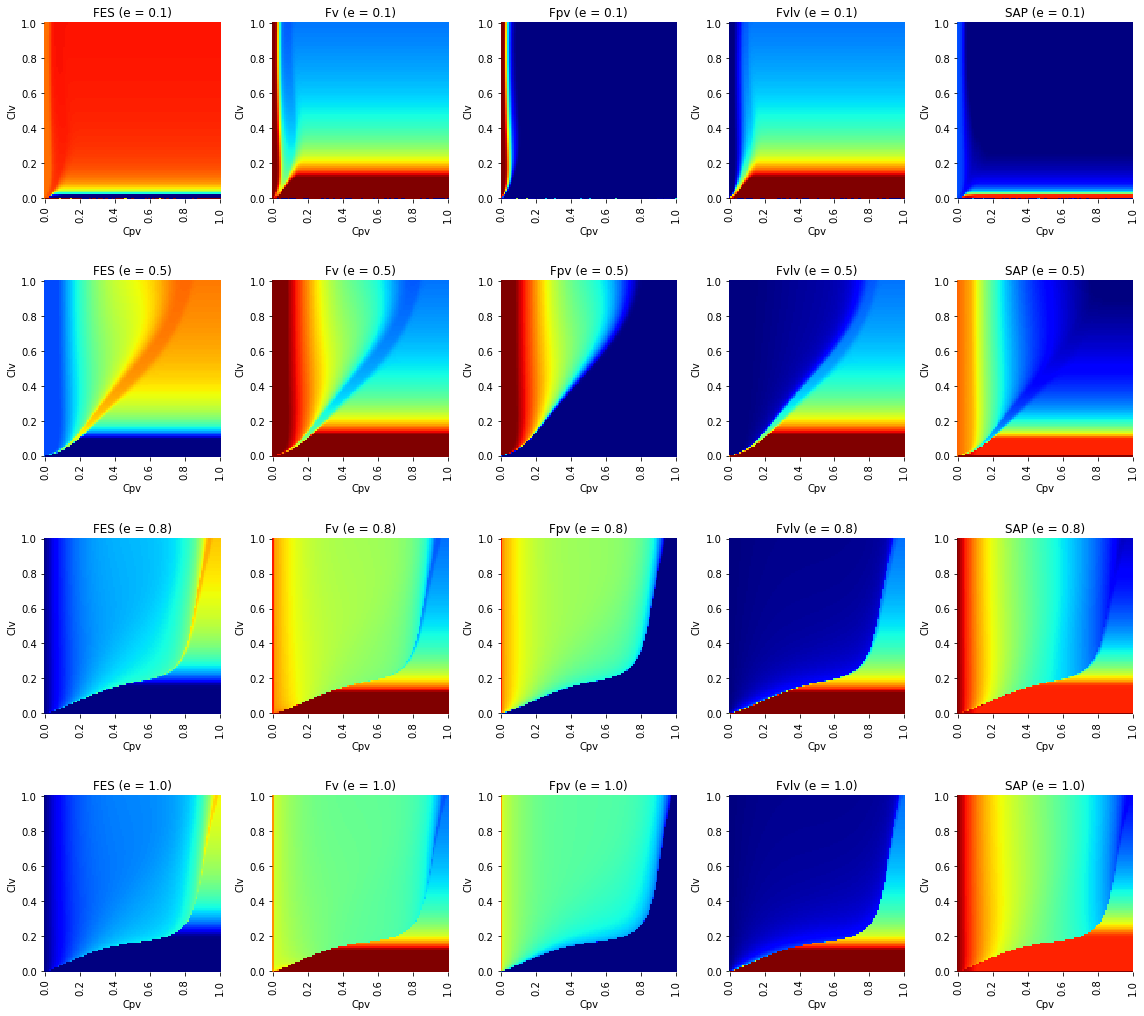

In [21]:
fig = plt.figure(figsize=(16, 18))
graph_pos = 0
for e in [0.1, 0.5, 0.8, 1.0]:
    for value in ["FES", "Fv","Fpv", "Fvlv", "SAP"]:
        graph_pos += 1
        if value == "SAP":
            vmin, vmax = -1.0, 0
        else:
            vmin, vmax = 0, 1.0
        
        ax = fig.add_subplot(5, 5, graph_pos)
        ax.set_title(value + f" (e = {e})")
        pivot = analytical_result[analytical_result.Effectiveness == e].pivot("Clv", "Cpv", value)
        sns.heatmap(pivot, 
                    cmap="jet", 
                    vmin=vmin, 
                    vmax=vmax, 
                    cbar=False, 
                    square=True, 
                    xticklabels=20,
                    yticklabels=20,
                    cbar_kws = {"orientation": "horizontal"})
        plt.yticks(rotation='horizontal')
        plt.xticks(rotation='vertical')
        plt.gca().invert_yaxis()
        plt.tight_layout()
#fig.savefig("../../analytical_single_episode/analytical_result_δ_0.025.png")

In [18]:
# 補助方程式でSVlvとIVlvを追跡するように変更したモデル
# 全体的にFpvが上がってFESが下がっている. 
test_result = pd.read_csv("../../analytical_single_episode/test_result/analytical_result_δ_0.25.csv")
test_result.head()

,Cpv,Clv,Effectiveness,FES,Fv,Fim,Fpv,Fvlv,SAP
0,0.0,0.00,0.1,-36615.047881,847580.829694,-392.321779,28531.074151,819049.755543,36615.047881
1,0.0,0.01,0.1,0.672686,1.128552,0.107744,0.578752,0.549799,-0.678184
2,0.0,0.02,0.1,0.691146,0.998381,0.099763,0.970890,0.027491,-0.691696
3,0.0,0.03,0.1,0.691024,0.999552,0.099940,0.998616,0.000936,-0.691053
4,0.0,0.04,0.1,0.691018,0.999498,0.099950,0.999569,-0.000071,-0.691018


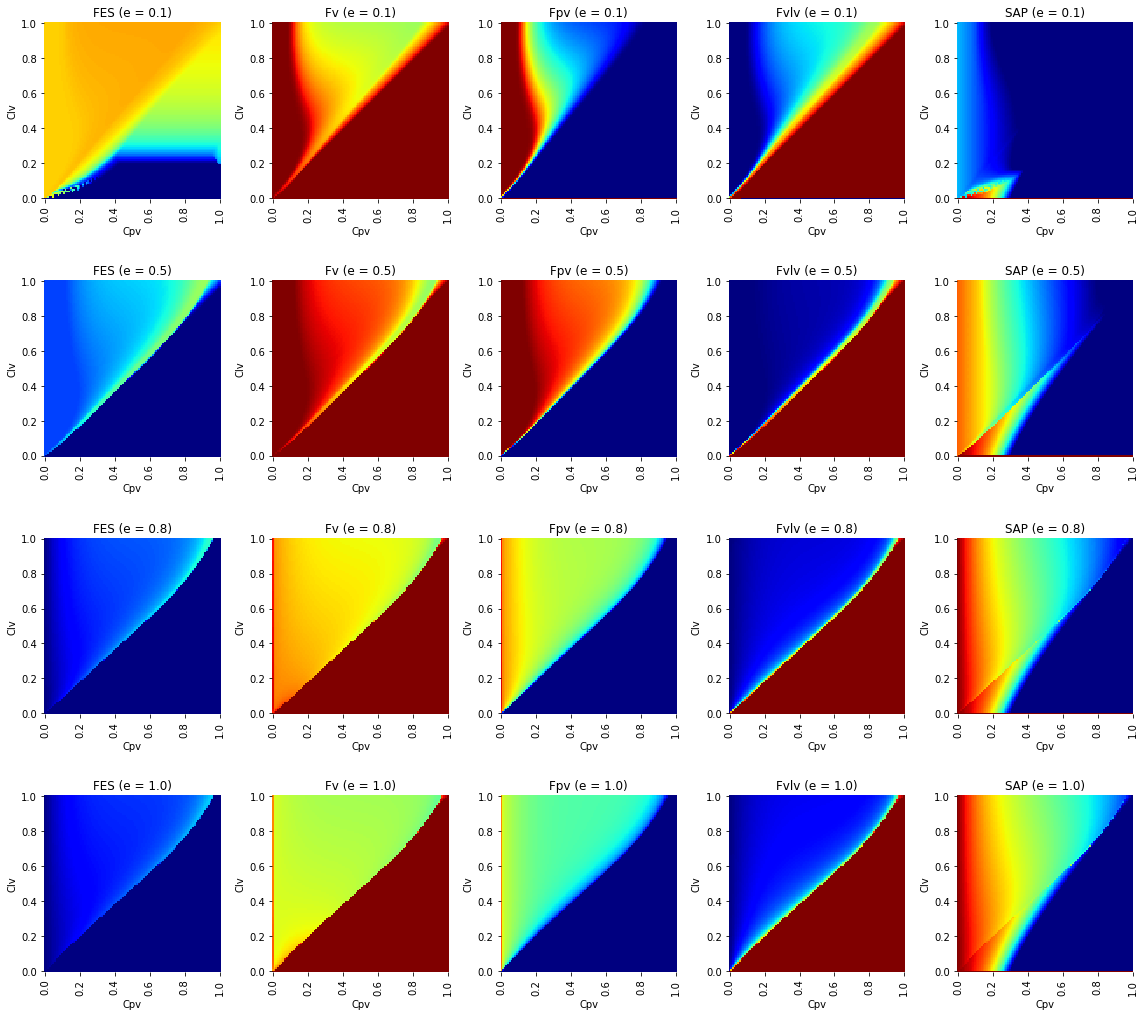

In [19]:
fig = plt.figure(figsize=(16, 18))
graph_pos = 0
for e in [0.1, 0.5, 0.8, 1.0]:
    for value in ["FES", "Fv","Fpv", "Fvlv", "SAP"]:
        graph_pos += 1
        if value == "SAP":
            vmin, vmax = -1.0, 0
        else:
            vmin, vmax = 0, 1.0
        
        ax = fig.add_subplot(5, 5, graph_pos)
        ax.set_title(value + f" (e = {e})")
        pivot = test_result[test_result.Effectiveness == e].pivot("Clv", "Cpv", value)
        sns.heatmap(pivot, 
                    cmap="jet", 
                    vmin=vmin, 
                    vmax=vmax, 
                    cbar=False, 
                    square=True,
                    xticklabels=20,
                    yticklabels=20,
                    cbar_kws = {"orientation": "horizontal"})
        plt.yticks(rotation='horizontal')
        plt.xticks(rotation='vertical')
        plt.gca().invert_yaxis()
        plt.tight_layout()
#fig.savefig("../../analytical_single_episode/analytical_result_δ_0.025.png")